In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.options.display.float_format="{:,.2f}".format

In [7]:
df=pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,"10,000.00",36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,"117,000.00",...,16.00,0.00,"36,369.00",41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"8,000.00",36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,"65,000.00",...,17.00,0.00,"20,131.00",53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"15,600.00",36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,"43,057.00",...,13.00,0.00,"11,987.00",92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"7,200.00",36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,"54,000.00",...,6.00,0.00,"5,472.00",21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"24,375.00",60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,"55,000.00",...,13.00,0.00,"24,584.00",69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,"396,030.00","14,113.89","8,357.44",500.00,"8,000.00","12,000.00","20,000.00","40,000.00"
int_rate,"396,030.00",13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,"396,030.00",431.85,250.73,16.08,250.33,375.43,567.30,"1,533.81"
annual_inc,"396,030.00","74,203.18","61,637.62",0.00,"45,000.00","64,000.00","90,000.00","8,706,582.00"
dti,"396,030.00",17.38,18.02,0.00,11.28,16.91,22.98,"9,999.00"
open_acc,"396,030.00",11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,"396,030.00",0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,"396,030.00","15,844.54","20,591.84",0.00,"6,025.00","11,181.00","19,620.00","1,743,266.00"
revol_util,"395,754.00",53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,"396,030.00",25.41,11.89,2.00,17.00,24.00,32.00,151.00


In [12]:
#Finding if there is null values
(df.isnull().sum()/df.shape[0])*100

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              5.79
emp_length             4.62
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.44
dti                    0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.07
total_acc              0.00
initial_list_status    0.00
application_type       0.00
mort_acc               9.54
pub_rec_bankruptcies   0.14
address                0.00
dtype: float64

In [13]:
#There are only 03 features with a "significant" percentage of null values : emp_title,emp_length, mort_acc,
#We will work with them in order to inpute the null values, the remaining features with null values will have their values dropped

In [14]:
df[["emp_title","emp_length","mort_acc"]].head()

,emp_title,emp_length,mort_acc
0,Marketing,10+ years,0.00
1,Credit analyst,4 years,3.00
2,Statistician,< 1 year,0.00
3,Client Advocate,6 years,0.00
4,Destiny Management Inc.,9 years,1.00


In [15]:
df[["emp_title","emp_length","mort_acc"]].dtypes

emp_title      object
emp_length     object
mort_acc      float64
dtype: object

In [16]:
#Analyzing the feature emp_title
df["emp_title"].nunique()

173105

In [18]:
#Due to emp_title is a categorical feature and has more than 173 000 unique values ,is a good idea to drop this feature since it can
#confuse or complicate the process of learning of the model
df=df.drop(columns=["emp_title"])

In [19]:
#Analyzing the feature emp_length
df["emp_length"].nunique()

11

In [20]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [22]:
#Filling the null values of the emp_length feature with the mode
df["emp_length"]=df["emp_length"].fillna(df["emp_length"].mode()[0])

In [23]:
#The null values of the column mort_acc are filled with the mean of this feature
df["mort_acc"]=df["mort_acc"].fillna(df["mort_acc"].mean())

In [24]:
#Finding if there is still null values in the dataframe
(df.isnull().sum()/df.shape[0])*100

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.44
dti                    0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.07
total_acc              0.00
initial_list_status    0.00
application_type       0.00
mort_acc               0.00
pub_rec_bankruptcies   0.14
address                0.00
dtype: float64

In [25]:
#We can see that there are still null values , but the percentage of these values is very low, so in order to delete this
#remaining null values we use the funcion dropna

df=df.dropna()


In [26]:
#Finding if there is still null values in the dataframe
(df.isnull().sum()/df.shape[0])*100

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.00
dti                    0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.00
total_acc              0.00
initial_list_status    0.00
application_type       0.00
mort_acc               0.00
pub_rec_bankruptcies   0.00
address                0.00
dtype: float64

In [27]:
#ANALYZING THE DIFFERENT TYPE OF FEATURES

In [28]:
#Categorical features
df.select_dtypes(include="object").head(2)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [29]:
#We drop the column address for not being important to the data

df=df.drop(columns=["address"])

In [31]:
#Defining the categorical features and their unique values 

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature term contains 2  distinct values 
The feature grade contains 7  distinct values 
The feature sub_grade contains 35  distinct values 
The feature emp_length contains 11  distinct values 
The feature home_ownership contains 6  distinct values 
The feature verification_status contains 3  distinct values 
The feature issue_d contains 112  distinct values 
The feature loan_status contains 2  distinct values 
The feature purpose contains 14  distinct values 
The feature title contains 48472  distinct values 
The feature earliest_cr_line contains 683  distinct values 
The feature initial_list_status contains 2  distinct values 
The feature application_type contains 3  distinct values 


In [33]:
#We drop the column title for having a big amount of unique values which can complicate the creation of the model

df=df.drop(columns=["title"])

In [34]:
#The variables issue_id & earliest_cr_line are converted to datetime

df["issue_d"]=pd.to_datetime(df["issue_d"])

df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])

In [35]:
#We extract the year and the month of de the features issue_d & earliest_cr 

df["issue_d_year"]=df["issue_d"].dt.year
df["issue_d_month"]=df["issue_d"].dt.month 

df["earliest_cr_line_year"]=df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"]=df["earliest_cr_line"].dt.month

In [36]:
#Dropping the variables features issue_d & earliest_cr since we already get the month and the year

df=df.drop(columns=["issue_d","earliest_cr_line"])

In [37]:
#We analyze one more time the remaning categorical variables

categoricas2=df.select_dtypes(include="object").columns

categoricas2

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [38]:
#Analyzing the variable loan_status since this is our label

df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
#We transform the categorical values of this feature in numerical values in order to train the Machine learning model

df["loan_status"]=df["loan_status"].apply(lambda x : 1 if x=='Fully Paid' else 0)

df["loan_status"].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

In [40]:
#Before feature engineering with the remaining categorical features,we must analyze the numerical features

numerical=df.select_dtypes(exclude="object").columns

numerical


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month'],
      dtype='object')

In [45]:
#Analyzing the correlation that the different numiercal values have with the label (loan status)
#We get the abs() and sort the values in order to see easily
df[numerical].corr()["loan_status"].abs().sort_values(ascending=False)

loan_status              1.00
int_rate                 0.25
revol_util               0.08
mort_acc                 0.07
dti                      0.06
issue_d_year             0.06
loan_amnt                0.06
annual_inc               0.05
installment              0.04
earliest_cr_line_year    0.04
open_acc                 0.03
pub_rec                  0.02
total_acc                0.02
issue_d_month            0.02
revol_bal                0.01
pub_rec_bankruptcies     0.01
earliest_cr_line_month   0.00
Name: loan_status, dtype: float64

In [46]:
#We can see that only 01 numerical value has a strong correlation with the label feature, therefore we can work only with these and dropping the rest
new_numerical=["loan_status","int_rate"]

In [47]:
#New dataset conformed only with the most important numerical features

df1=df[new_numerical]

In [48]:
#Finding the remaining categorical values in roder to apply get_dummies and create new features
categorical3=df.select_dtypes(include="object").columns
categorical3

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [50]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[categorical3])

#Joining the new features with the dataframe conformed with the most important numerical features
df2=pd.concat([df1,new_features],axis=1)

df2.head()

,loan_status,int_rate,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,1,11.44,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,11.99,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,10.49,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,6.49,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,17.27,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [56]:
#Defining X and y
X=df2.drop(columns=["loan_status"])
y=df2[["loan_status"]]

In [57]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

loan_status
1             80.38
0             19.62
dtype: float64

In [58]:
#Managing the imbalanced classes with imblearn
!pip install imblearn

In [61]:
from imblearn.combine import SMOTEENN

imp=SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal=imp.fit_resample(X,y)

#Finding out if the imbalaced data continues

y_bal.value_counts()/y_bal.shape[0]

loan_status
1             0.62
0             0.38
dtype: float64

In [62]:
#Saving the new data in order to save time in the future analysis

new_data=pd.concat([X_bal,y_bal],axis=1)

new_data.to_csv("new_data_lending_club.csv")

In [65]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, random_state=42)

In [66]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [67]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [68]:
#Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler

In [69]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
# models.append(("SVM",SVC(gamma="auto")))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

#Evaluate each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :85.64% (0.20%)
LDA :85.09% (0.23%)
Naive Bayes :77.61% (0.43%)
KNN :89.86% (0.17%)
Decision Tree :95.04% (0.12%)
Random Forest :96.88% (0.11%)
Bagging Class :95.58% (0.15%)
Extra trees :96.99% (0.11%)
Ada Boost :81.13% (0.28%)
Gradient Boosting :81.92% (0.19%)


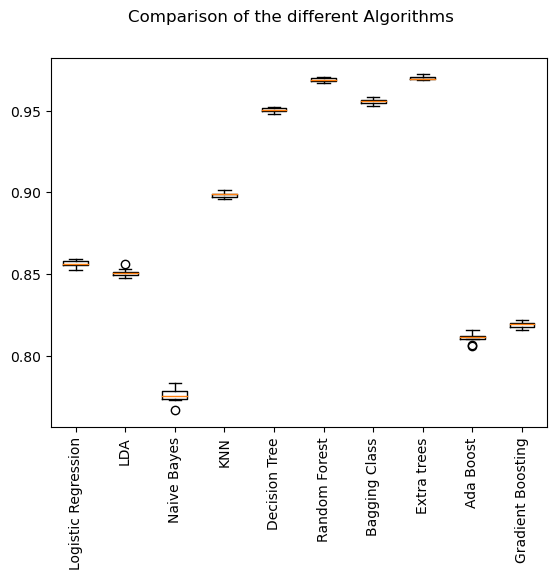

In [70]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [71]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))

In [72]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV

import numpy as np

max_depth=np.arange(15,20)

parametros=dict(max_depth=max_depth)

model=ExtraTreesClassifier()

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.876765 using the params {'max_depth': 19}
0.835235 (0.002125) with {'max_depth': 15}
0.843500 (0.001917) with {'max_depth': 16}
0.854322 (0.002499) with {'max_depth': 17}
0.866163 (0.001658) with {'max_depth': 18}
0.876765 (0.001747) with {'max_depth': 19}


In [73]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_lending_club.pkl","wb"))

In [74]:
#Saving the scaler
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))

In [106]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.731674  
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     31888
           1       0.87      0.94      0.90     52115

    accuracy                           0.88     84003
   macro avg       0.88      0.86      0.87     84003
weighted avg       0.88      0.88      0.87     84003



In [82]:
#Proving the results

for i in range(0,20):
    
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 


In [83]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X_bal.columns,range(X_bal.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [84]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [85]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [98]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=len(X_train.columns)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.3469 - accuracy: 0.8490 - val_loss: 0.3216 - val_accuracy: 0.8625
Epoch 2/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.3189 - accuracy: 0.8613 - val_loss: 0.3147 - val_accuracy: 0.8643
Epoch 3/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.3086 - accuracy: 0.8669 - val_loss: 0.3138 - val_accuracy: 0.8639
Epoch 4/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.2998 - accuracy: 0.8717 - val_loss: 0.3022 - val_accuracy: 0.8699
Epoch 5/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.2913 - accuracy: 0.8753 - val_loss: 0.2997 - val_accuracy: 0.8743
Epoch 6/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.2825 - accuracy: 0.8800 - val_loss: 0.2953 - val_accuracy: 0.8769
Epoch 7/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.2741 - accuracy: 0.8840 - val_loss: 0.2878 -

Epoch 57/200
9801/9801 [==============================] - 18s 2ms/step - loss: 0.1549 - accuracy: 0.9362 - val_loss: 0.3087 - val_accuracy: 0.9100
Epoch 58/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.1529 - accuracy: 0.9366 - val_loss: 0.3061 - val_accuracy: 0.9083
Epoch 59/200
9801/9801 [==============================] - 17s 2ms/step - loss: 0.1533 - accuracy: 0.9366 - val_loss: 0.3222 - val_accuracy: 0.9099
Epoch 60/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.1521 - accuracy: 0.9368 - val_loss: 0.3249 - val_accuracy: 0.9103
Epoch 61/200
9801/9801 [==============================] - 15s 2ms/step - loss: 0.1605 - accuracy: 0.9371 - val_loss: 0.2742 - val_accuracy: 0.9081
Epoch 62/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.1497 - accuracy: 0.9374 - val_loss: 0.3078 - val_accuracy: 0.9062
Epoch 63/200
9801/9801 [==============================] - 16s 2ms/step - loss: 0.1583 - accuracy: 0.9371 - val_loss: 0

In [99]:
#Evaluating the model
model.evaluate(X_test,y_test)

2626/2626 [==============================] - 3s 1ms/step - loss: 0.3508 - accuracy: 0.9139


[0.35078108310699463, 0.9139078259468079]

In [101]:
#Saving the model
model.save("model_clasification_keras.h5")

In [107]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(model.predict(X_test).reshape(-1,1).round(),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

2626/2626 [==============================] - 2s 933us/step
Cohen Kappa : 0.815253  
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     31888
           1       0.92      0.95      0.93     52115

    accuracy                           0.91     84003
   macro avg       0.91      0.90      0.91     84003
weighted avg       0.91      0.91      0.91     84003



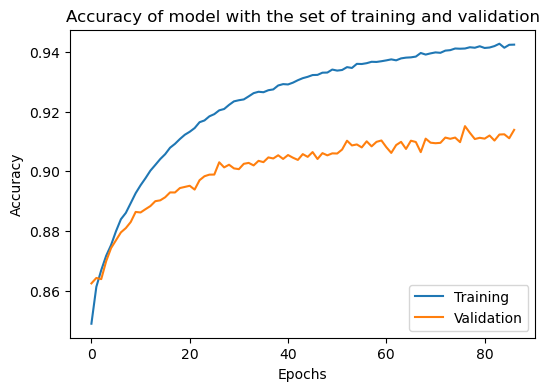

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [105]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 1 
